In [12]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [22]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')]
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].sample(10)

300312     90000.0
186559     90250.0
349909     80000.0
753773     80000.0
344847     80000.0
601414     65000.0
446254     40307.5
753811    167500.0
604151     90000.0
29413     148500.0
Name: salary_year_avg, dtype: float64

<Axes: >

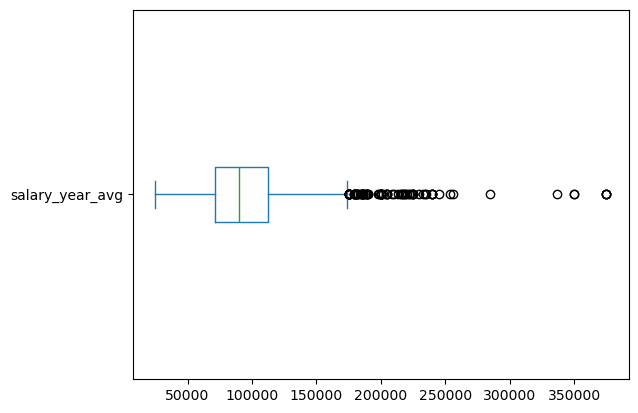

In [24]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

/var/folders/p0/rl5q6h9933b1gn010v9h_c4r0000gn/T/ipykernel_1687/727958452.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


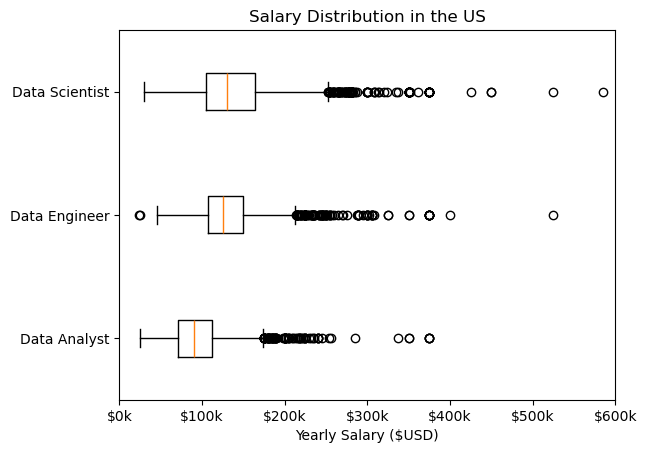

In [42]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg']for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()


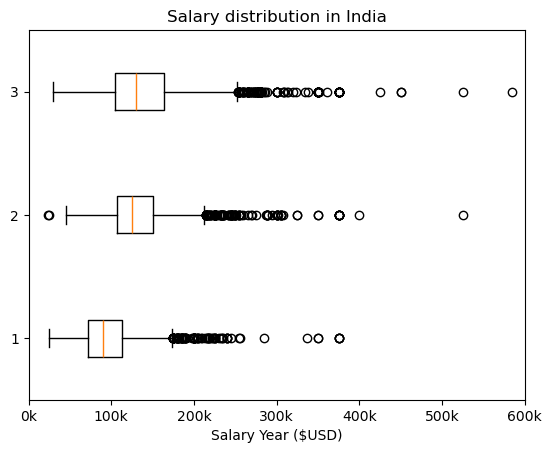

In [54]:
job_titles_IND = ['Data Enghineer', 'Data Scientist', 'Data Analyst']
df_IND = df[(df['job_title_short'].isin(job_titles_IND))&(df['job_country']=='India')]
df_IND=df_IND.dropna(subset=['salary_year_avg'])
job_IND_list = [df_IND[df_IND['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, label=job_titles, vert=False)
plt.title('Salary distribution in India')
plt.xlabel('Salary Year ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()
